In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject.LaminartKernels, MEngProject.LaminartInitFunc, MEngProject.Utils, BenchmarkTools, Test

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260


In [2]:
using OrdinaryDiffEq, ParameterizedFunctions, LSODA, Sundials, DiffEqDevTools

# GPU

In [3]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("temp5_100_100_gs.png"), Parameters.parameters_f32);

In [4]:
# img = convert(Array{Float32,2}, load(datadir("temp5_100_100_gs.png")));
# img = LaminartGPU.reshape2d_4d(img)
# img = cu(img)

# r = similar(img)

# p = LaminartGPU.kernels_gpu(img, Parameters.parameters);

# LaminartGPU.I_u!(r, img, p)
# temp_out = (I = img, r = r)
# p = merge(p, temp_out);

tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [5]:
sol = solve(prob);

In [6]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  139.04 MiB
  allocs estimate:  2961361
  --------------
  minimum time:     1.375 s (3.27% GC)
  median time:      1.386 s (3.48% GC)
  mean time:        1.392 s (3.76% GC)
  maximum time:     1.419 s (4.78% GC)
  --------------
  samples:          4
  evals/sample:     1

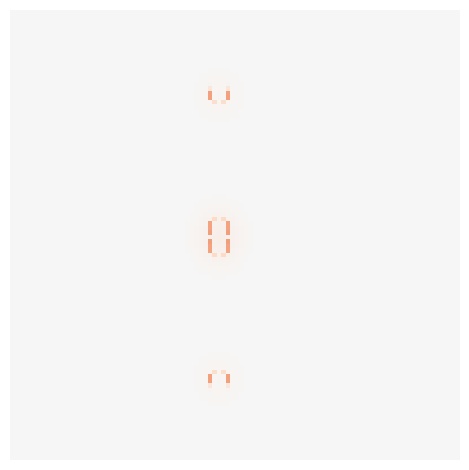

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/eVYIC/src/host/indexing.jl:43


In [7]:
Utils.plot_rb(sol(100)[:,:,8,1])

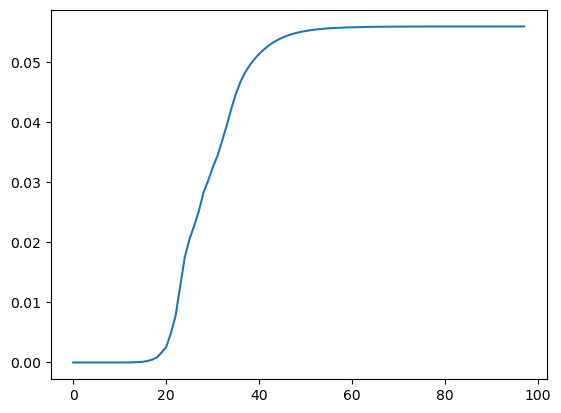

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f38a6604750>

In [8]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [9]:
sol_cpu = Array(sol)
sol = nothing;

# CPU Float32

In [47]:
p = LaminartInitFunc.parameterInit_conv_cpu(datadir("temp5_100_100_gs.png"), Parameters.parameters_f32);

tspan = (0.0f0, 100f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1);

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [48]:
sol = solve(prob);

In [49]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  49.32 GiB
  allocs estimate:  294494
  --------------
  minimum time:     56.283 s (2.40% GC)
  median time:      56.283 s (2.40% GC)
  mean time:        56.283 s (2.40% GC)
  maximum time:     56.283 s (2.40% GC)
  --------------
  samples:          1
  evals/sample:     1

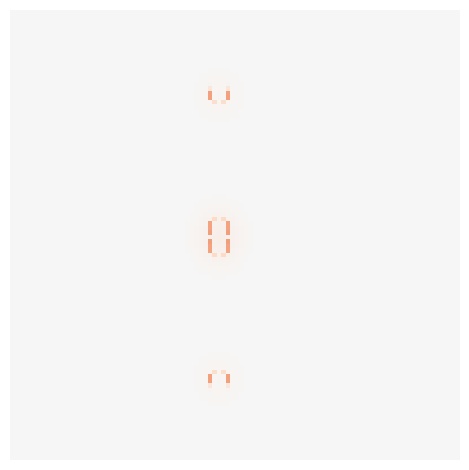

In [50]:
Utils.plot_rb(sol(100)[:,:,8,1])

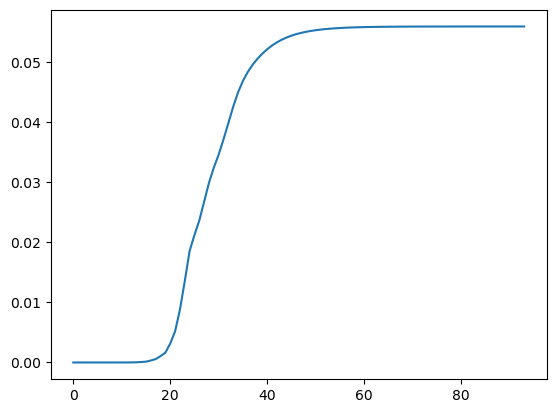

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f37bee69110>

In [51]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [52]:
sol_cpu = Array(sol)
sol = nothing;

# CPU imfilter

In [90]:
p = LaminartInitFunc.parameterInit_imfil_cpu(datadir("temp5_100_100_gs.png"), Parameters.parameters_f32);

In [102]:
tspan = (0.0f0, 100f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

arr1 = u0[:, :, 1:p.K]
arr2 = u0[:, :, 1];

f = LaminartFunc.LamFunction_imfil_cpu_a(
#     similar(arr1), #x
#     similar(arr1), #m
#     similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
    similar(arr1), # H_z_temp,
    similar(arr2), # v_C_temp1,
    similar(arr2), # v_C_temp2,
    similar(arr1), # v_C_tempA,
    similar(arr1[:,:,1]), #W_temp
# similar(arr1), # dy_temp,
# similar(arr1), # dm_temp,
# similar(arr1), # dz_temp,
# similar(arr1), # ds_temp,
# similar(arr2), # dv_temp,
# similar(arr1), # H_z_temp,
# similar(arr2), #  V_temp_1,
# similar(arr2), #  V_temp_2,
# similar(arr1), #  A_temp,
# similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [103]:
sol = solve(prob);

In [104]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  3.94 GiB
  allocs estimate:  1481687
  --------------
  minimum time:     11.333 s (1.16% GC)
  median time:      11.333 s (1.16% GC)
  mean time:        11.333 s (1.16% GC)
  maximum time:     11.333 s (1.16% GC)
  --------------
  samples:          1
  evals/sample:     1

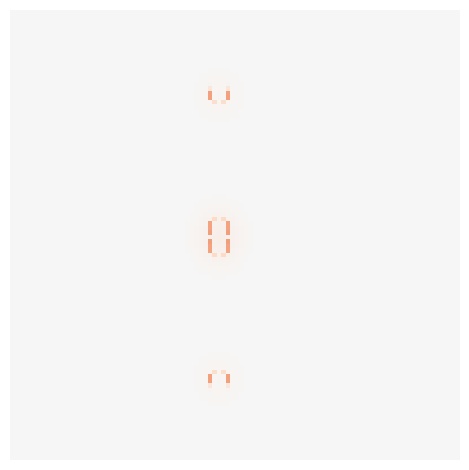

In [105]:
Utils.plot_rb(sol(100)[:,:,8,1])

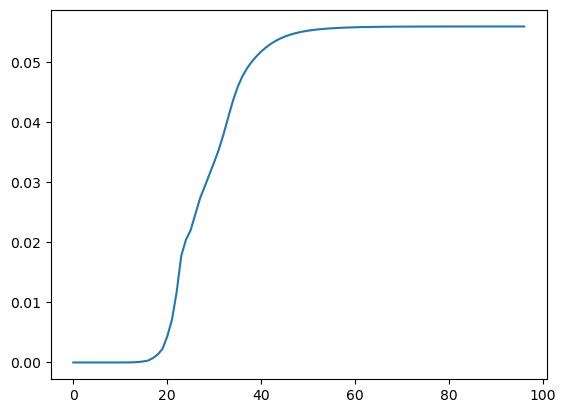

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f37ae7ded10>

In [106]:
plot(sol[findmax(sol[:,:,7,end])[2][1],findmax(sol[:,:,7,end])[2][2],7,:])

In [107]:
sol_cpu = Array(sol)
sol = nothing;

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [115]:
out = similar(p.I)
@benchmark imfilter!(out, p.I, p.k_gauss_1)

BenchmarkTools.Trial: 
  memory estimate:  64.94 KiB
  allocs estimate:  56
  --------------
  minimum time:     333.296 μs (0.00% GC)
  median time:      344.397 μs (0.00% GC)
  mean time:        354.512 μs (1.76% GC)
  maximum time:     24.723 ms (96.88% GC)
  --------------
  samples:          10000
  evals/sample:     1

# Imfilter GPU FIR

In [3]:
p = LaminartInitFunc.parameterInit_imfil_cpu(datadir("temp5_100_100_gs.png"), Parameters.parameters_f32);

In [4]:
tspan = (0.0f0, 100f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

arr1 = u0[:, :, 1:p.K]
arr2 = u0[:, :, 1];

f = LaminartFunc.LamFunction_imfil_gpu_fir(
#     similar(arr1), #x
#     similar(arr1), #m
#     similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
    similar(arr1), # H_z_temp,
    similar(arr2), # v_C_temp1,
    similar(arr2), # v_C_temp2,
    similar(arr1), # v_C_tempA,
    similar(arr1[:,:,1]), #W_temp
# similar(arr1), # dy_temp,
# similar(arr1), # dm_temp,
# similar(arr1), # dz_temp,
# similar(arr1), # ds_temp,
# similar(arr2), # dv_temp,
# similar(arr1), # H_z_temp,
# similar(arr2), #  V_temp_1,
# similar(arr2), #  V_temp_2,
# similar(arr1), #  A_temp,
# similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [5]:
sol = solve(prob);

In [6]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  1.34 GiB
  allocs estimate:  361803
  --------------
  minimum time:     36.237 s (0.13% GC)
  median time:      36.237 s (0.13% GC)
  mean time:        36.237 s (0.13% GC)
  maximum time:     36.237 s (0.13% GC)
  --------------
  samples:          1
  evals/sample:     1

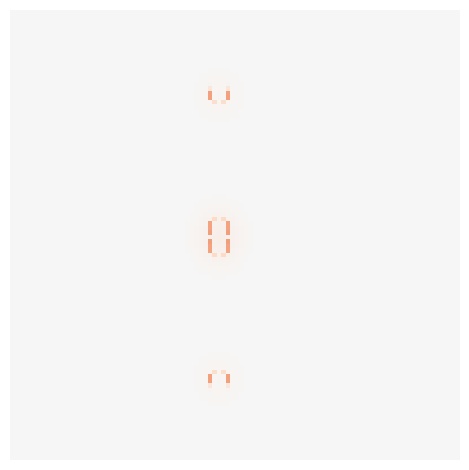

In [7]:
Utils.plot_rb(sol(100)[:,:,8,1])

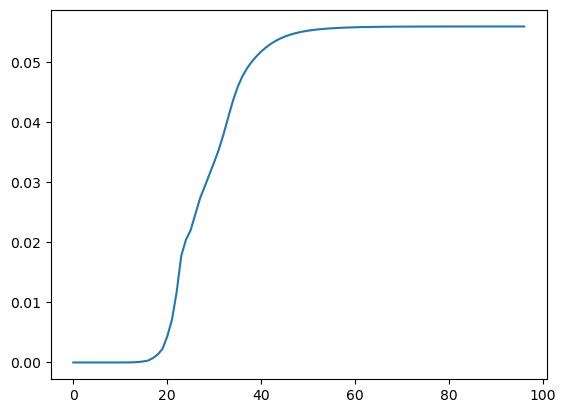

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f14482a3610>

In [8]:
plot(sol[findmax(sol[:,:,7,end])[2][1],findmax(sol[:,:,7,end])[2][2],7,:])

In [9]:
sol_cpu = Array(sol)
sol = nothing;

# Imfilter GPU IIR

In [11]:
p = LaminartInitFunc.parameterInit_imfil_cpu(datadir("temp5_100_100_gs.png"), Parameters.parameters_f32);

Revise.LogRecord(Error, (compiled mode) evaluation error starting at /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/Parameters.jl:21, lowered, Revise_fb86e9d0, "/mnt/storage_1/users/cullinanen/.julia/packages/Revise/BqeJF/src/lowered.jl", 85, (mod=MEngProject.Parameters, ex=begin
    #= /mnt/storage_1/users/cullinanen/.julia/dev/MEngProject.jl/src/Parameters.jl:21 =#
    parameters_f32 = (K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = p_temp_f32.σ_1, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = p_temp_f32.σ_2, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 4 * ceil(Int, p_temp_f32.σ_2) + 1, H_σ_x = p_temp_f32.H_σ_x, H_σ_y = p_temp_f32.H_σ_y, H_fact = 5.0f0, H_l = 19, T_fact = [0.87f0, 0.13f0], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u =

In [12]:
tspan = (0.0f0, 100f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

arr1 = u0[:, :, 1:p.K]
arr2 = u0[:, :, 1];

f = LaminartFunc.LamFunction_imfil_gpu_iir(
#     similar(arr1), #x
#     similar(arr1), #m
#     similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
    similar(arr1), # H_z_temp,
    similar(arr2), # v_C_temp1,
    similar(arr2), # v_C_temp2,
    similar(arr1), # v_C_tempA,
    similar(arr1[:,:,1]), #W_temp
# similar(arr1), # dy_temp,
# similar(arr1), # dm_temp,
# similar(arr1), # dz_temp,
# similar(arr1), # ds_temp,
# similar(arr2), # dv_temp,
# similar(arr1), # H_z_temp,
# similar(arr2), #  V_temp_1,
# similar(arr2), #  V_temp_2,
# similar(arr1), #  A_temp,
# similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [13]:
sol = solve(prob);

In [14]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  1.34 GiB
  allocs estimate:  361803
  --------------
  minimum time:     36.077 s (0.23% GC)
  median time:      36.077 s (0.23% GC)
  mean time:        36.077 s (0.23% GC)
  maximum time:     36.077 s (0.23% GC)
  --------------
  samples:          1
  evals/sample:     1

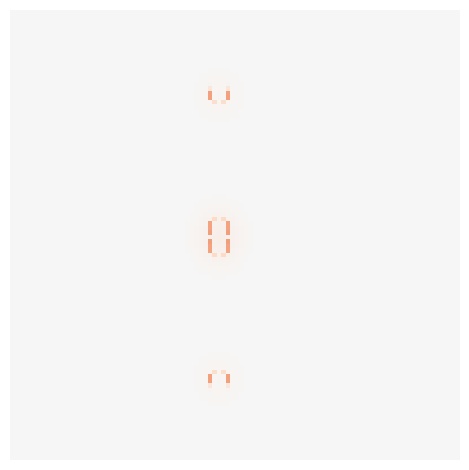

In [15]:
Utils.plot_rb(sol(100)[:,:,8,1])

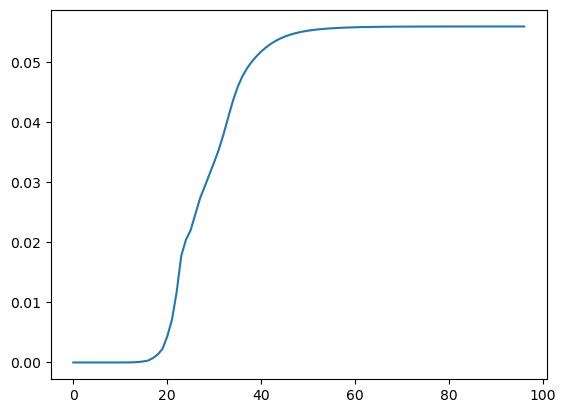

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1446dd2090>

In [16]:
plot(sol[findmax(sol[:,:,7,end])[2][1],findmax(sol[:,:,7,end])[2][2],7,:])

In [17]:
sol_cpu = Array(sol)
sol = nothing;

# Imfilter GPU FFT

In [19]:
p = LaminartInitFunc.parameterInit_imfil_cpu(datadir("temp5_100_100_gs.png"), Parameters.parameters_f32);

In [20]:
tspan = (0.0f0, 100f0)
u0 = reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

arr1 = u0[:, :, 1:p.K]
arr2 = u0[:, :, 1];

f = LaminartFunc.LamFunction_imfil_gpu_fft(
#     similar(arr1), #x
#     similar(arr1), #m
#     similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
    similar(arr1), # H_z_temp,
    similar(arr2), # v_C_temp1,
    similar(arr2), # v_C_temp2,
    similar(arr1), # v_C_tempA,
    similar(arr1[:,:,1]), #W_temp
# similar(arr1), # dy_temp,
# similar(arr1), # dm_temp,
# similar(arr1), # dz_temp,
# similar(arr1), # ds_temp,
# similar(arr2), # dv_temp,
# similar(arr1), # H_z_temp,
# similar(arr2), #  V_temp_1,
# similar(arr2), #  V_temp_2,
# similar(arr1), #  A_temp,
# similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [21]:
sol = solve(prob);

In [22]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  1.51 GiB
  allocs estimate:  457163
  --------------
  minimum time:     36.352 s (0.09% GC)
  median time:      36.352 s (0.09% GC)
  mean time:        36.352 s (0.09% GC)
  maximum time:     36.352 s (0.09% GC)
  --------------
  samples:          1
  evals/sample:     1

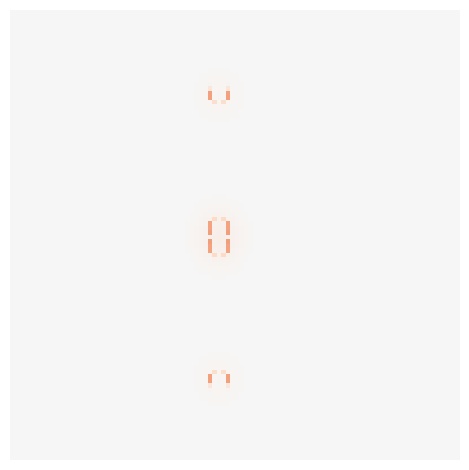

In [23]:
Utils.plot_rb(sol(100)[:,:,8,1])

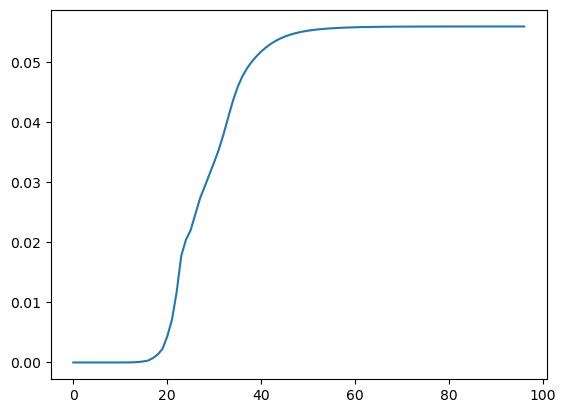

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1446c80ad0>

In [24]:
plot(sol[findmax(sol[:,:,7,end])[2][1],findmax(sol[:,:,7,end])[2][2],7,:])

In [25]:
sol_cpu = Array(sol)
sol = nothing;

In [29]:
@benchmark imfilter(p.I, p.k_gauss_1, "circular")

BenchmarkTools.Trial: 
  memory estimate:  103.48 KiB
  allocs estimate:  48
  --------------
  minimum time:     332.611 μs (0.00% GC)
  median time:      348.397 μs (0.00% GC)
  mean time:        360.791 μs (2.01% GC)
  maximum time:     23.620 ms (98.52% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [30]:
@benchmark imfilter(p.I, p.k_gauss_1, Fill(0.0f0))

BenchmarkTools.Trial: 
  memory estimate:  101.39 KiB
  allocs estimate:  41
  --------------
  minimum time:     345.132 μs (0.00% GC)
  median time:      351.021 μs (0.00% GC)
  mean time:        359.463 μs (1.83% GC)
  maximum time:     13.300 ms (93.51% GC)
  --------------
  samples:          10000
  evals/sample:     1